In [39]:
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import matplotlib.pyplot as plt

def read_file_signal(file_path, index):
    f = plib.EdfReader(file_path)
    signal = f.readSignal(index)
    f.close()
    return signal

def signal_labels(file_path):
    f = plib.EdfReader(file_path)
    labels = f.getSignalLabels()
    f.close()
    return labels

def combined_signal(file_list, index):
    combined_signals = []
    for file in file_list:
        temp = read_file_signal(file, index)
        combined_signals.append(temp)
    return np.concatenate(combined_signals)

edf_files_severe = [
    "c:\\Users\\anany\\Downloads\\00000066-297469[001].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[002].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[003].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[004].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[005].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[006].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[007].edf"
]

edf_files_normal = [
    "C:\\Users\\anany\\Downloads\\00000064-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[009].edf"
]

edf_files_moderate = [
    "C:\\Users\\anany\\Downloads\\00000074-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[009].edf"
]

edf_files_mild = [
    "C:\\Users\\anany\\Downloads\\00000067-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[009].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[010].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[011].edf",
]

labels = signal_labels(edf_files_normal[0])
print(labels)
labels[16] = "Flow patient 1"
labels[17] = "Flow patient 2"
labels[23] = "Flow patient 3"
cv_dict = {}

['EEG F3-A2', 'EEG F4-A1', 'EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EOG LOC-A2', 'EOG ROC-A2', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'ECG II', 'Snore', 'Flow Patient', 'Flow Patient', 'Effort THO', 'Effort ABD', 'SpO2', 'Pleth', 'Body', 'Flow Patient', 'xPAP CPAP', 'xPAP IPAP', 'xPAP EPAP', 'Leak Total', 'PulseRate', 'PressCheck', 'ECG IIHF', 'Technical']


In [40]:
import statistics as stat
import matplotlib.pyplot as plt

def plot_signal(label, signal):
    plt.figure(figsize=(20, 10))
    plt.plot(signal)
    plt.title(f"{label} signal")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    # plt.ylim(-300, 300)
    plt.show()

def thresholding(signal, threshold, replace_with):
    mean = signal.mean()
    std = stat.stdev(signal)
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std
    filtered_signal = np.where((signal >= lower_limit) & (signal <= upper_limit), signal, replace_with)
    return filtered_signal

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

In [41]:
normal_dnd_signals = []

for i in range(32):
    combined_sig = combined_signal(edf_files_normal, i)
    resampled_signal = resample_signal(combined_sig, 25200)
    if i in [23, 37]:
        thresholded_signal = thresholding(resampled_signal, 2, 0)
    else:
        thresholded_signal = thresholding(resampled_signal, 2, resampled_signal.mean())
    normal_dnd_signals.append(thresholded_signal)

In [42]:
mild_dnd_signals = []

for i in range(32):
    combined_sig = combined_signal(edf_files_mild, i)
    resampled_signal = resample_signal(combined_sig, 25200)
    thresholded_signal = thresholding(resampled_signal, 2, resampled_signal.mean())
    mild_dnd_signals.append(thresholded_signal)

In [43]:
moderate_dnd_signals = []

for i in range(32):
    combined_sig = combined_signal(edf_files_moderate, i)
    resampled_signal = resample_signal(combined_sig, 25200)
    thresholded_signal = thresholding(resampled_signal, 2, resampled_signal.mean())
    moderate_dnd_signals.append(thresholded_signal)

In [44]:
severe_dnd_signals = []

for i in range(32):
    combined_sig = combined_signal(edf_files_severe, i)
    resampled_signal = resample_signal(combined_sig, 25200)
    thresholded_signal = thresholding(resampled_signal, 2, resampled_signal.mean())
    severe_dnd_signals.append(thresholded_signal)

In [45]:
def time_divisions(signal):
    time_division = []
    length = len(signal)//7
    for i in range(7):
        time_division.append(signal[i*length:(i+1)*length])
    return time_division

In [46]:
final_dict = {
    "normal": {},
    "mild": {},
    "moderate": {},
    "severe": {}   
}

for i in range(32):
    normal_time_div = time_divisions(normal_dnd_signals[i])
    mild_time_div = time_divisions(mild_dnd_signals[i])
    moderate_time_div = time_divisions(moderate_dnd_signals[i])
    severe_time_div = time_divisions(severe_dnd_signals[i])
    final_dict["normal"][labels[i]] = normal_time_div
    final_dict["mild"][labels[i]] = mild_time_div
    final_dict["moderate"][labels[i]] = moderate_time_div
    final_dict["severe"][labels[i]] = severe_time_div

print(final_dict["normal"].keys())

dict_keys(['EEG F3-A2', 'EEG F4-A1', 'EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EOG LOC-A2', 'EOG ROC-A2', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'ECG II', 'Snore', 'Flow patient 1', 'Flow patient 2', 'Effort THO', 'Effort ABD', 'SpO2', 'Pleth', 'Body', 'Flow patient 3', 'xPAP CPAP', 'xPAP IPAP', 'xPAP EPAP', 'Leak Total', 'PulseRate', 'PressCheck', 'ECG IIHF', 'Technical'])


In [47]:
print(final_dict["normal"][labels[0]][0].shape)

(3600,)


In [48]:
means_dict = {
    "normal" : {},
    "mild" : {},
    "moderate" : {},
    "severe" : {}
}
### check logic 
for i in final_dict.items():
    for j in i[1].items():
        means = []
        for k in j[1]:
            means.append(k.mean())
        means_dict[i[0]][j[0]] = means  

print(means_dict["normal"])

{'EEG F3-A2': [-7.504365419576758, -8.719388343389708, -13.00668232763515, -7.04027219993723, -7.027790191409834, -191.52132577458903, -289.7070615961705], 'EEG F4-A1': [-13.27637041280586, -13.090010389178182, -12.433137883758626, -13.547190917940341, -13.278914561522486, -11.97419445011348, -12.147717112017704], 'EEG A1-A2': [0.010726667938952137, -0.08607666051212051, -0.04005085795797132, -0.06114997536252758, -0.03696249740712631, -0.29607279189111246, -0.06416079532231511], 'EEG C3-A2': [-6.446360610797605, -5.780065962463187, -6.127295189414532, -6.338958837110981, -6.236792154217211, -6.4348358695116685, -4.785967564258225], 'EEG C4-A1': [8.48336680140326, 8.778399273679847, 8.269707929572883, 8.632373743339826, 8.432217579991532, 8.517068961797483, 9.269900821229706], 'EEG O1-A2': [301.1110986943799, 301.42637006575734, 304.45612984898816, 304.2694211075372, 306.70790987035934, 304.28321584224966, 306.054699691637], 'EEG O2-A1': [302.4998879590849, 304.8242519955999, 306.49003

In [49]:
import math

cov_dict = {
    "normal" : {},
    "mild" : {},
    "moderate" : {},
    "severe" : {}
}

for i in means_dict.items():
    for j in i[1].items():
        var = stat.variance(j[1])
        sum = 0
        for k in j[1]:
            sum = sum+k
        mean = sum/7
        cov = abs(var/mean)
        if math.isnan(cov):
            cov = 0
        cov_dict[i[0]][j[0]] = cov

print(cov_dict)

{'normal': {'EEG F3-A2': 181.7349011091737, 'EEG F4-A1': 0.03038738931373335, 'EEG A1-A2': 0.11993717790115989, 'EEG C3-A2': 0.05797332988200151, 'EEG C4-A1': 0.012260786492023742, 'EEG O1-A2': 0.014729833359461472, 'EEG O2-A1': 0.014302434604375306, 'EOG LOC-A2': 0.012293090989244877, 'EOG ROC-A2': 0.018815007611587428, 'EMG Chin': 0.07640977864169268, 'Leg 1': 0.020775089265201427, 'Leg 2': 0.009738547014560277, 'ECG I': 2.96681576632306, 'RR': 0.0009742342612877072, 'ECG II': 7.624910379953815, 'Snore': 0.03555954217027193, 'Flow patient 1': 0.095761684549444, 'Flow patient 2': 1.7113945248398854, 'Effort THO': 0.08587799985781251, 'Effort ABD': 0.02630963065728239, 'SpO2': 0.004635455776595544, 'Pleth': 0.5078071114295033, 'Body': 0, 'Flow patient 3': 4.85436142383654e-19, 'xPAP CPAP': 0, 'xPAP IPAP': 0, 'xPAP EPAP': 0, 'Leak Total': 0.004370511461298211, 'PulseRate': 0.031688644233754754, 'PressCheck': 0, 'ECG IIHF': 3.5727279313401956, 'Technical': 24.005870664777678}, 'mild': {'

C:\Users\anany\AppData\Local\Temp\ipykernel_23088\321869530.py:17: RuntimeWarning: invalid value encountered in scalar divide
  cov = abs(var/mean)


In [50]:
cv_dict = {}


for label in labels:
    timed_cv_list = []
    for time in range(7):
        data = []
        for type in ['normal', 'mild', 'moderate', 'severe']:
            data.append(means_dict[type][label][time])
        var = stat.variance(data)
        mean = stat.mean(data) 
        cv = abs(var/mean)
        timed_cv_list.append(cv)
    cv_dict[label] = timed_cv_list

print(cv_dict)


{'EEG F3-A2': [0.23045980295325372, 0.46270342785118357, 2.0577448006576278, 0.19244584506672993, 0.14939853580958048, 168.111333636675, 266.6198497412206], 'EEG F4-A1': [5.8925365497143194e-05, 0.010374283817169002, 0.020780644389986364, 0.007228523690113489, 0.006802962326730446, 0.0403475458849037, 0.020763095104216915], 'EEG A1-A2': [0.07128508166581402, 0.3605972880494013, 0.11823098284474601, 0.34370114487156384, 4.81000142008858, 0.4347394417395126, 0.40768817833376975], 'EEG C3-A2': [0.052810200425296286, 0.045563578341803516, 0.018564973643830522, 0.023453046483015026, 0.005545640868786602, 0.004345480988669056, 0.07005151434736316], 'EEG C4-A1': [0.0020876586890485847, 0.04684039662639024, 0.017627078078817672, 0.008353084566950136, 0.02108380979391439, 0.005604730224046607, 0.026539527240818893], 'EEG O1-A2': [0.049832488438348733, 0.05114602273910059, 0.028914997110181875, 0.055193406871117026, 0.08356098134177109, 0.08958979901432161, 0.04337400264209198], 'EEG O2-A1': [0.

C:\Users\anany\AppData\Local\Temp\ipykernel_23088\1613974552.py:12: RuntimeWarning: invalid value encountered in scalar divide
  cv = abs(var/mean)


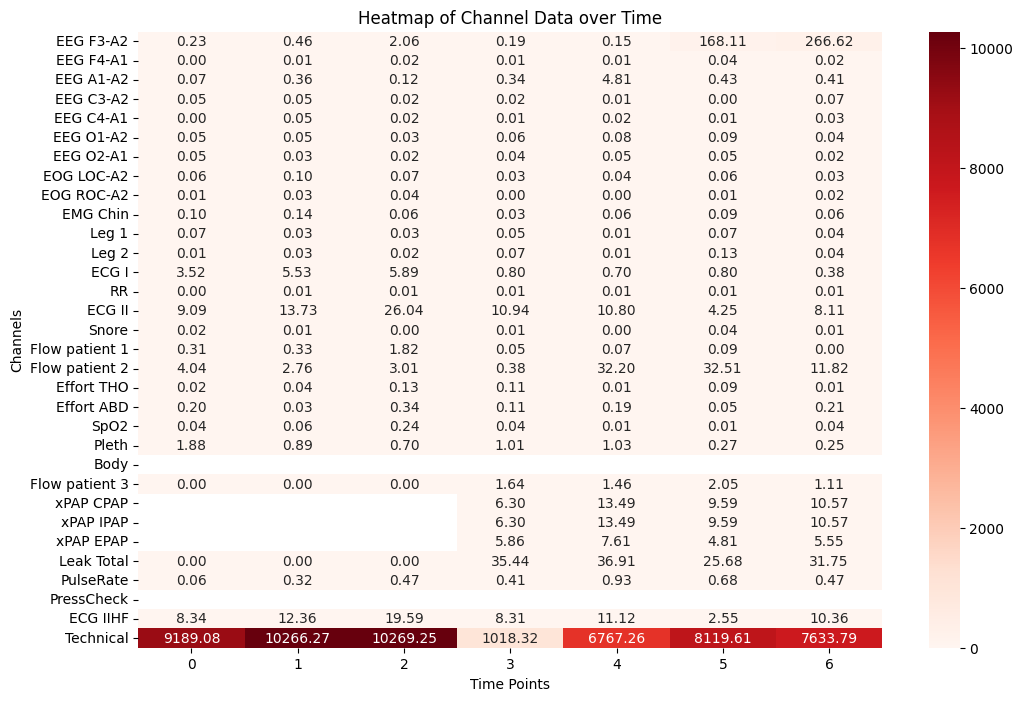

In [51]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(cv_dict).T  # Transpose to make channels the rows and time points the columns

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(df, cmap='Reds', annot=True, fmt=".2f")

# Add labels and title
plt.xlabel("Time Points")
plt.ylabel("Channels")
plt.title("Heatmap of Channel Data over Time")

# Show the plot
plt.show()

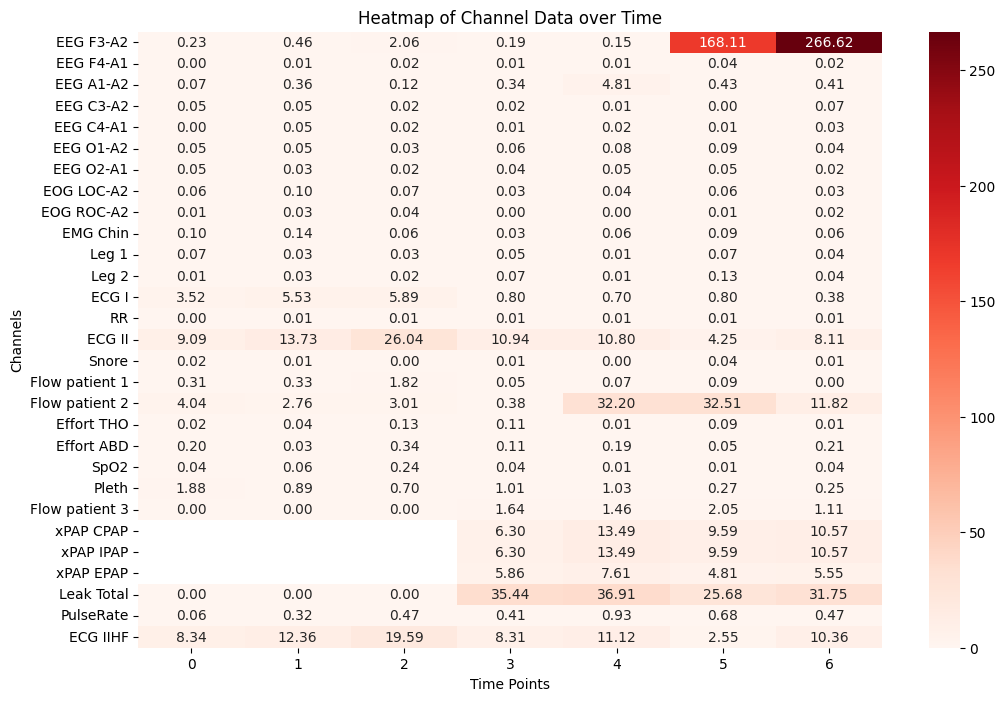

In [52]:
import pandas as pd
import seaborn as sns

del cv_dict["Technical"]
del cv_dict["Body"]
del cv_dict["PressCheck"]

df = pd.DataFrame(cv_dict).T  # Transpose to make channels the rows and time points the columns

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(df, cmap='Reds', annot=True, fmt=".2f")

# Add labels and title
plt.xlabel("Time Points")
plt.ylabel("Channels")
plt.title("Heatmap of Channel Data over Time")

# Show the plot
plt.show()

c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


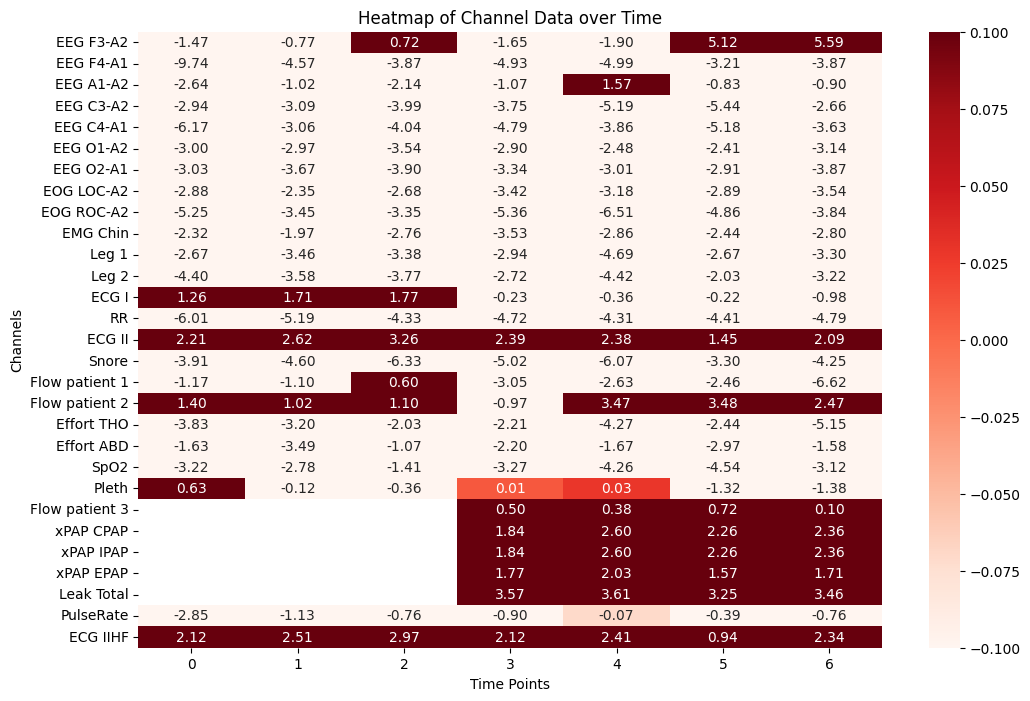

In [53]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(cv_dict).T  # Transpose to make channels the rows and time points the columns
df_log = np.log(df)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(df_log, cmap='Reds', annot=True, fmt=".2f")

# Add labels and title
plt.xlabel("Time Points")
plt.ylabel("Channels")
plt.title("Heatmap of Channel Data over Time")

# Show the plot
plt.show()

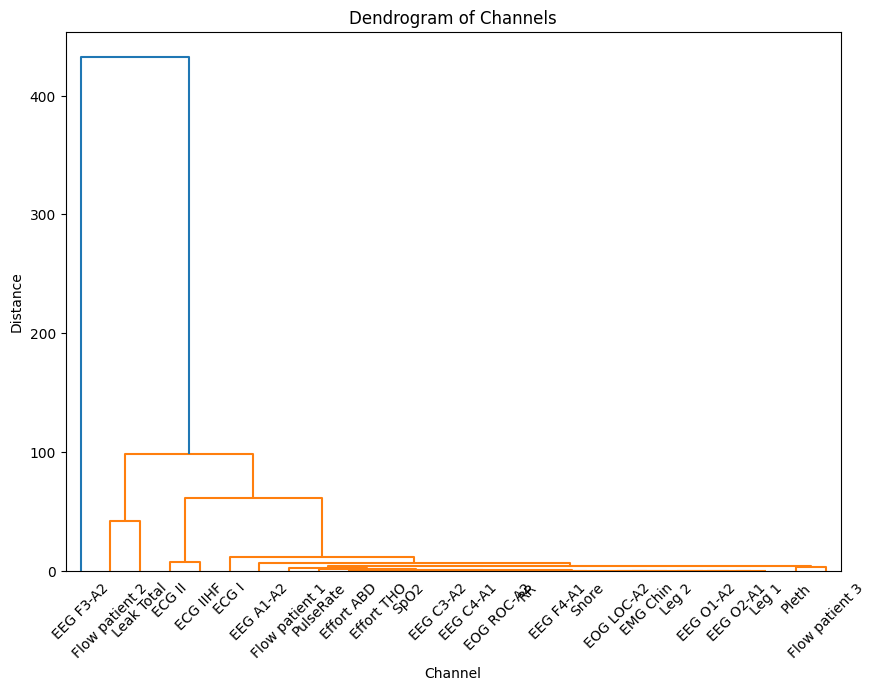

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage

df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)  # Remove infinite values

Z = linkage(df, method='ward')  # 'ward' minimizes the variance of the clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df.index)
plt.title("Dendrogram of Channels")
plt.xlabel("Channel")
plt.ylabel("Distance")
plt.show()

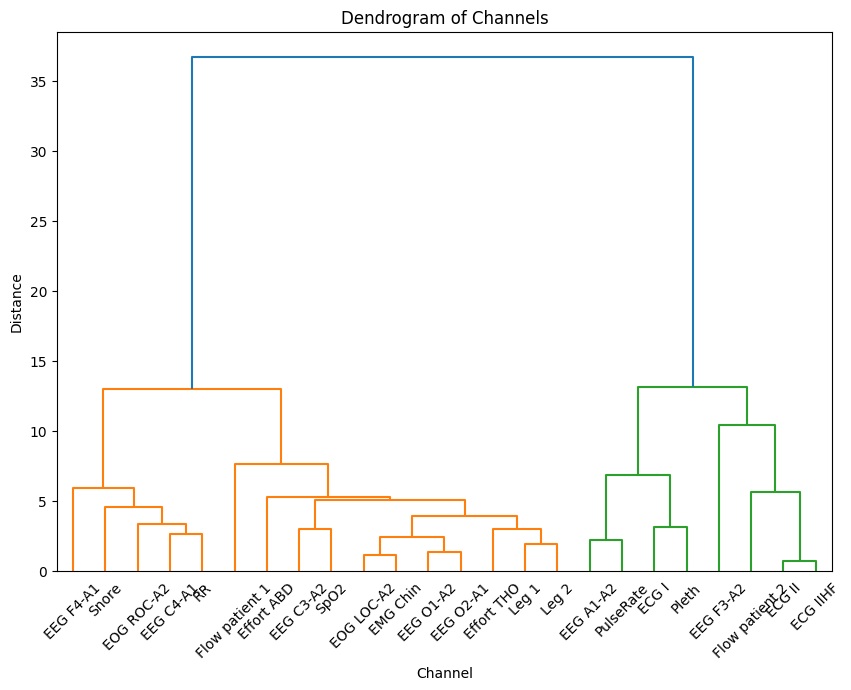

In [55]:
df_log = np.log(df)
df_log = df_log.replace([np.inf, -np.inf], np.nan).dropna(axis=0)  # Remove infinite values

Z = linkage(df_log, method='ward')  # 'ward' minimizes the variance of the clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_log.index)
plt.title("Dendrogram of Channels")
plt.xlabel("Channel")
plt.ylabel("Distance")
plt.show()

In [56]:
print(df.shape)

(26, 7)


Explained variance by each component: [0.46575724 0.28999239]


C:\Users\anany\AppData\Local\Temp\ipykernel_23088\608696504.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors


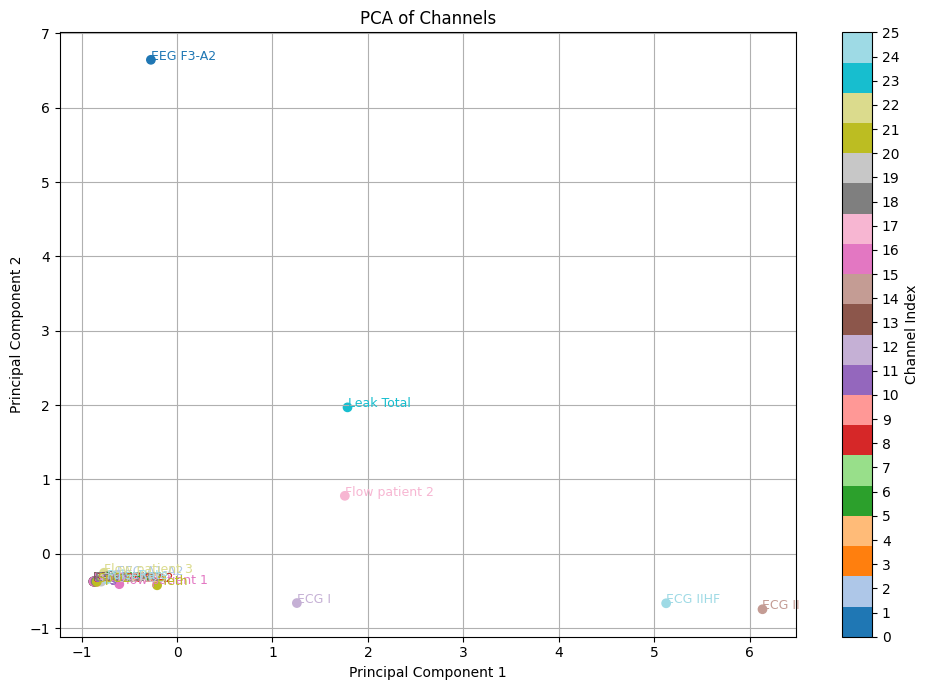

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with channel data
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Generate a color map
num_channels = X_pca.shape[0]
colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors

# Get the channel names
channel_names = df.index.tolist()

# Plot the results with different colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(num_channels), cmap='tab20')

# Add a color bar to indicate which color corresponds to which channel
plt.colorbar(scatter, ticks=np.arange(num_channels), label='Channel Index')

# Annotate each point with the corresponding channel name
for i, channel in enumerate(channel_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], channel, fontsize=9, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Channels')
plt.grid(True)
plt.tight_layout()
plt.show()


Explained variance by each component: [0.55862784 0.35801529]


C:\Users\anany\AppData\Local\Temp\ipykernel_23088\2828343472.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors


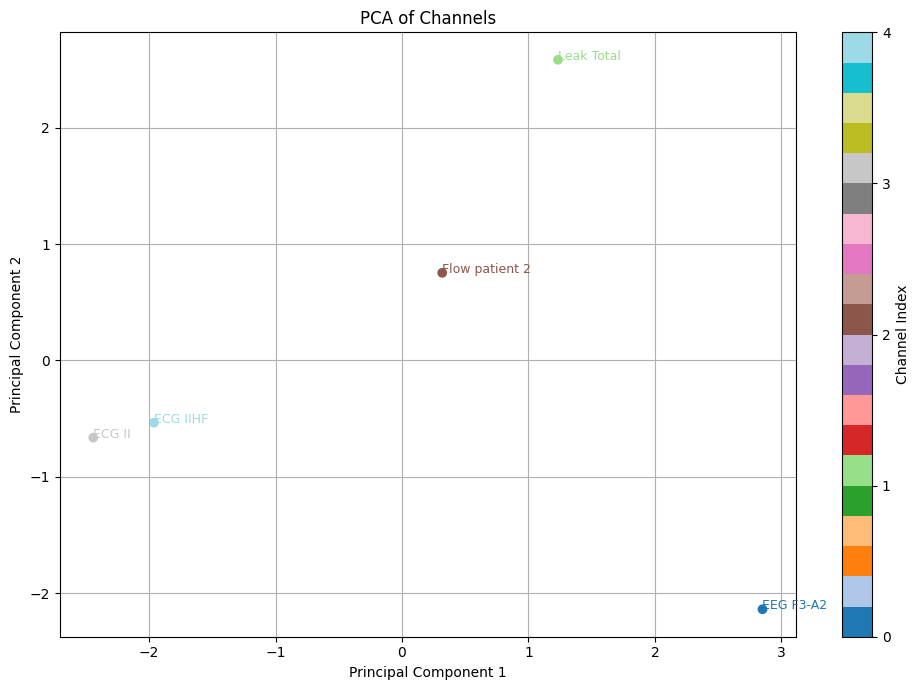

In [58]:
top_5_dict = {
    "EEG F3-A2": cv_dict["EEG F3-A2"],
    "Leak Total": cv_dict["Leak Total"],
    "Flow patient 2": cv_dict["Flow patient 2"],
    "ECG II": cv_dict["ECG II"],
    "ECG IIHF": cv_dict["ECG IIHF"]
}

top_5_df = pd.DataFrame(top_5_dict).T  # Transpose to make channels the rows and time points the columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(top_5_df)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Generate a color map
num_channels = X_pca.shape[0]
colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors

# Get the channel names
channel_names = top_5_df.index.tolist()

# Plot the results with different colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(num_channels), cmap='tab20')

# Add a color bar to indicate which color corresponds to which channel
plt.colorbar(scatter, ticks=np.arange(num_channels), label='Channel Index')

# Annotate each point with the corresponding channel name
for i, channel in enumerate(channel_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], channel, fontsize=9, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Channels')
plt.grid(True)
plt.tight_layout()
plt.show()

Explained variance by each component: [0.81121248 0.08717019]


C:\Users\anany\AppData\Local\Temp\ipykernel_23088\1665744740.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors


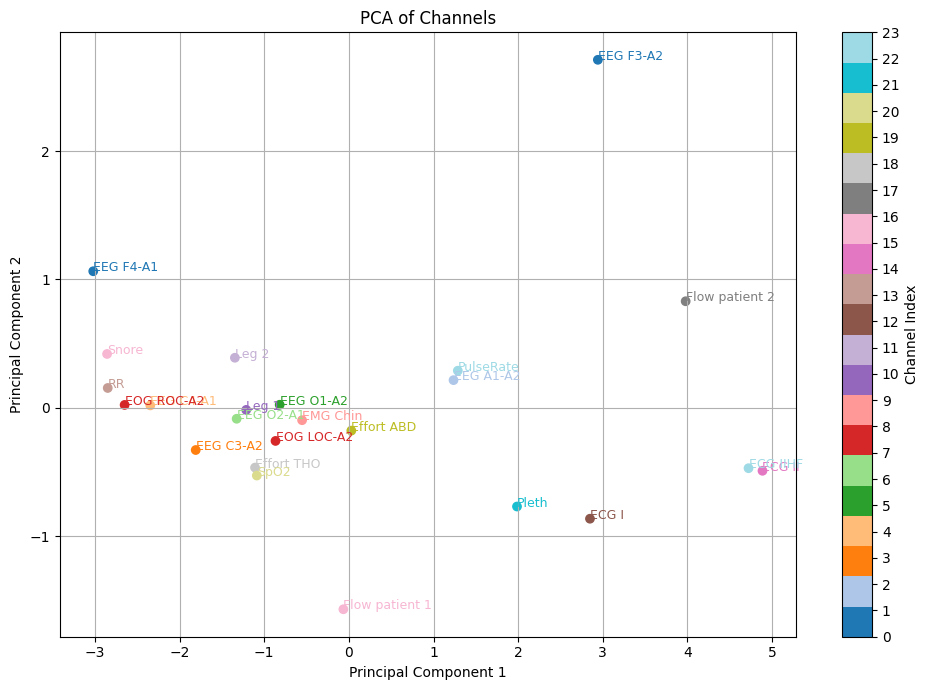

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_log is your DataFrame with channel data
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_log)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Generate a color map
num_channels = X_pca.shape[0]
colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors

# Get the channel names
channel_names = df_log.index.tolist()

# Plot the results with different colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(num_channels), cmap='tab20')

# Add a color bar to indicate which color corresponds to which channel
plt.colorbar(scatter, ticks=np.arange(num_channels), label='Channel Index')

# Annotate each point with the corresponding channel name
for i, channel in enumerate(channel_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], channel, fontsize=9, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Channels')
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
print("Number of channels (rows in df):", df.shape[0])
print("Number of points in PCA result:", X_pca.shape[0])

Number of channels (rows in df): 26
Number of points in PCA result: 24


Explained variance by each component: [0.95961872 0.03821388]


C:\Users\anany\AppData\Local\Temp\ipykernel_23088\3160520572.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors


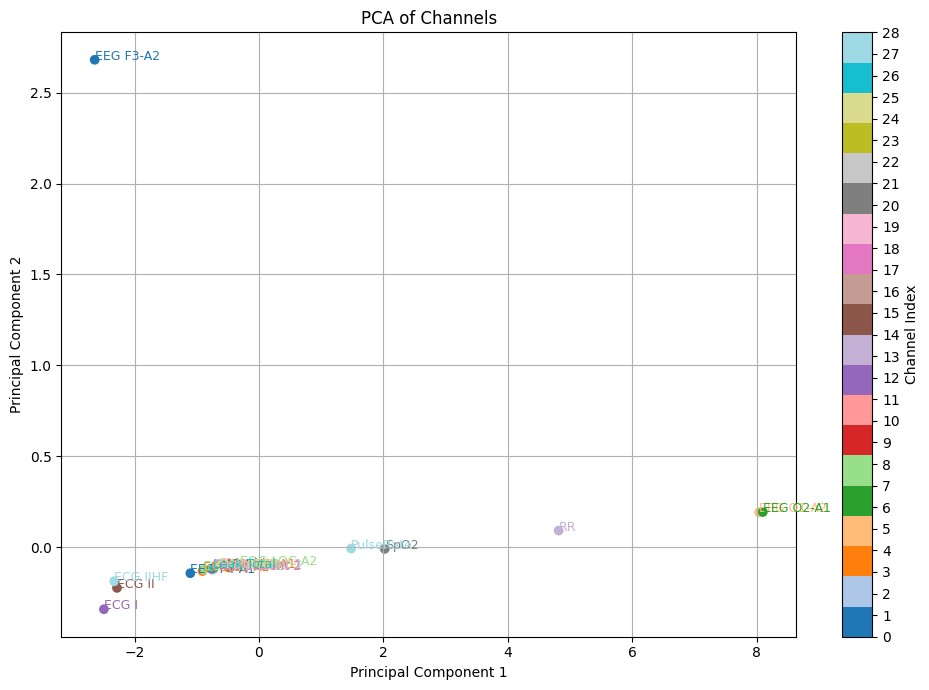

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming normal_df is your DataFrame with channel data
# Normalize the data
del means_dict["normal"]["Technical"]
del means_dict["normal"]["Body"]
del means_dict["normal"]["PressCheck"]

normal_df = pd.DataFrame(means_dict["normal"]).T
scaler = StandardScaler()
X_scaled = scaler.fit_transform(normal_df)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Generate a color map
num_channels = X_pca.shape[0]
colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors

# Get the channel names
channel_names = normal_df.index.tolist()

# Plot the results with different colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(num_channels), cmap='tab20')

# Add a color bar to indicate which color corresponds to which channel
plt.colorbar(scatter, ticks=np.arange(num_channels), label='Channel Index')

# Annotate each point with the corresponding channel name
for i, channel in enumerate(channel_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], channel, fontsize=9, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Channels')
plt.grid(True)
plt.tight_layout()
plt.show()


Explained variance by each component: [0.71189714 0.28422694]


C:\Users\anany\AppData\Local\Temp\ipykernel_23088\3075075583.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors


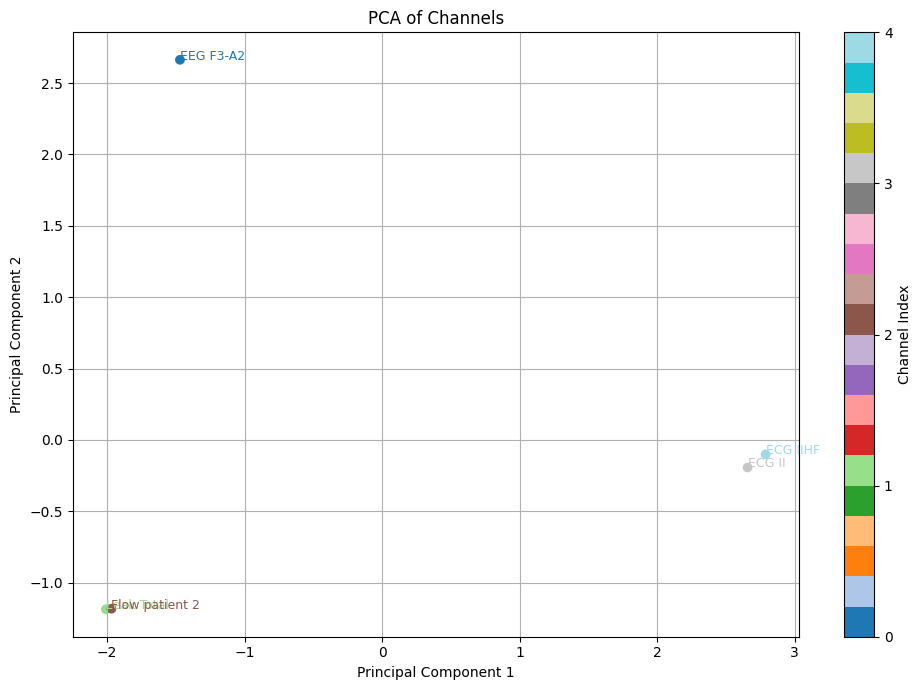

In [62]:
top_5_normal_dict = {
    "EEG F3-A2": means_dict["normal"]["EEG F3-A2"],
    "Leak Total": means_dict["normal"]["Leak Total"],
    "Flow patient 2": means_dict["normal"]["Flow patient 2"],
    "ECG II": means_dict["normal"]["ECG II"],
    "ECG IIHF": means_dict["normal"]["ECG IIHF"]
}

top_5_normal_df = pd.DataFrame(top_5_normal_dict).T  # Transpose to make channels the rows and time points the columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(top_5_normal_df)
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Generate a color map
num_channels = X_pca.shape[0]
colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors

# Get the channel names
channel_names = top_5_normal_df.index.tolist()

# Plot the results with different colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(num_channels), cmap='tab20')

# Add a color bar to indicate which color corresponds to which channel
plt.colorbar(scatter, ticks=np.arange(num_channels), label='Channel Index')

# Annotate each point with the corresponding channel name
for i, channel in enumerate(channel_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], channel, fontsize=9, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Channels')
plt.grid(True)
plt.tight_layout()
plt.show()

Explained variance by each component: [0.99796422 0.00169667]


C:\Users\anany\AppData\Local\Temp\ipykernel_23088\906259846.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors


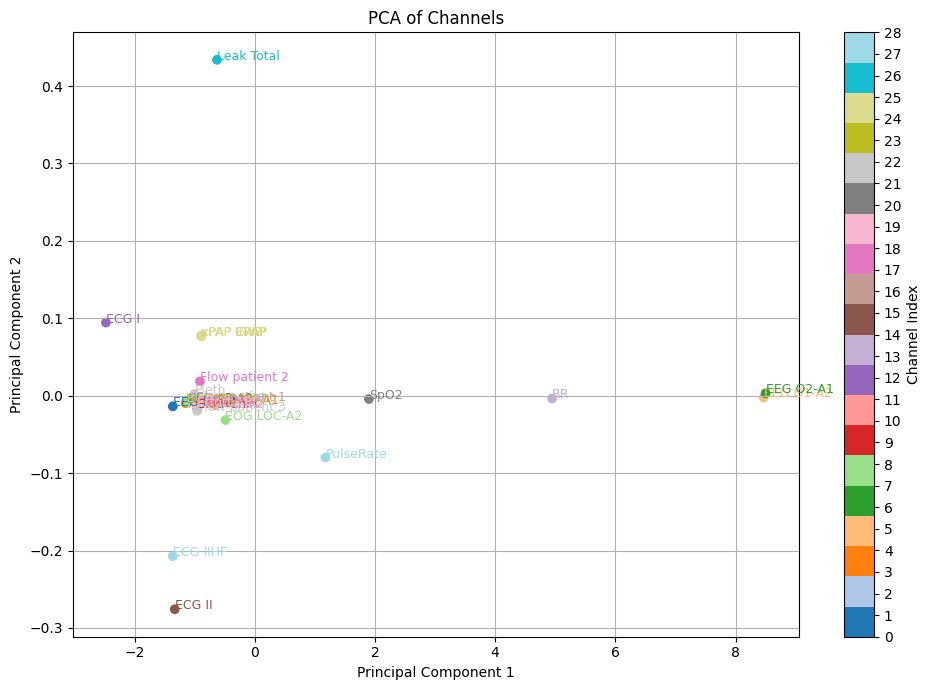

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming mild_df is your DataFrame with channel data
# mildize the data
del means_dict["mild"]["Technical"]
del means_dict["mild"]["Body"]
del means_dict["mild"]["PressCheck"]

mild_df = pd.DataFrame(means_dict["mild"]).T
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mild_df)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Generate a color map
num_channels = X_pca.shape[0]
colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors

# Get the channel names
channel_names = mild_df.index.tolist()

# Plot the results with different colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(num_channels), cmap='tab20')

# Add a color bar to indicate which color corresponds to which channel
plt.colorbar(scatter, ticks=np.arange(num_channels), label='Channel Index')

# Annotate each point with the corresponding channel name
for i, channel in enumerate(channel_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], channel, fontsize=9, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Channels')
plt.grid(True)
plt.tight_layout()
plt.show()

Explained variance by each component: [0.99767286 0.00224584]


C:\Users\anany\AppData\Local\Temp\ipykernel_23088\2188853930.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors


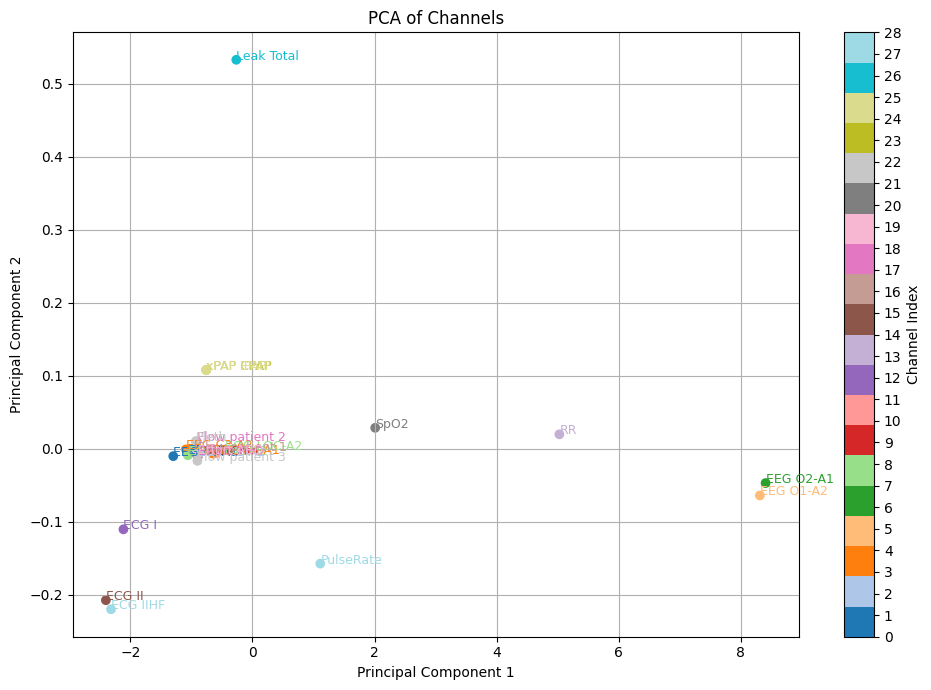

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming moderate_df is your DataFrame with channel data
# moderateize the data
del means_dict["moderate"]["Technical"]
del means_dict["moderate"]["Body"]
del means_dict["moderate"]["PressCheck"]

moderate_df = pd.DataFrame(means_dict["moderate"]).T
scaler = StandardScaler()
X_scaled = scaler.fit_transform(moderate_df)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Generate a color map
num_channels = X_pca.shape[0]
colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors

# Get the channel names
channel_names = moderate_df.index.tolist()

# Plot the results with different colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(num_channels), cmap='tab20')

# Add a color bar to indicate which color corresponds to which channel
plt.colorbar(scatter, ticks=np.arange(num_channels), label='Channel Index')

# Annotate each point with the corresponding channel name
for i, channel in enumerate(channel_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], channel, fontsize=9, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Channels')
plt.grid(True)
plt.tight_layout()
plt.show()

Explained variance by each component: [0.99219576 0.00695631]


C:\Users\anany\AppData\Local\Temp\ipykernel_23088\1018449313.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors


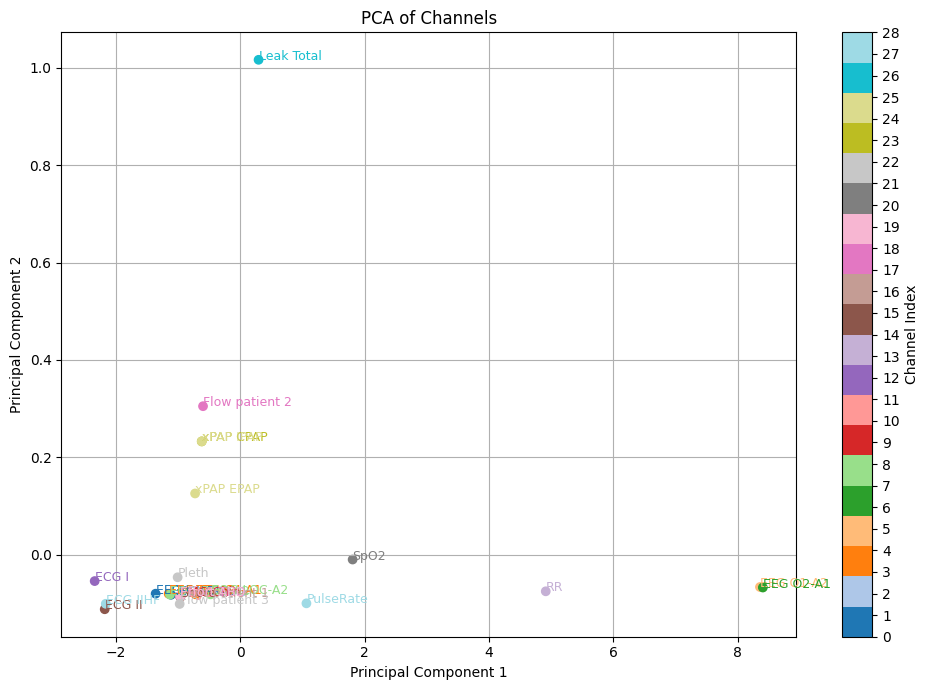

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming severe_df is your DataFrame with channel data
# severeize the data
del means_dict["severe"]["Technical"]
del means_dict["severe"]["Body"]
del means_dict["severe"]["PressCheck"]

severe_df = pd.DataFrame(means_dict["severe"]).T
scaler = StandardScaler()
X_scaled = scaler.fit_transform(severe_df)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Generate a color map
num_channels = X_pca.shape[0]
colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors

# Get the channel names
channel_names = severe_df.index.tolist()

# Plot the results with different colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(num_channels), cmap='tab20')

# Add a color bar to indicate which color corresponds to which channel
plt.colorbar(scatter, ticks=np.arange(num_channels), label='Channel Index')

# Annotate each point with the corresponding channel name
for i, channel in enumerate(channel_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], channel, fontsize=9, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Channels')
plt.grid(True)
plt.tight_layout()
plt.show()

Explained variance by each component: [0.89795577 0.08412346]


C:\Users\anany\AppData\Local\Temp\ipykernel_23088\1856246344.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors


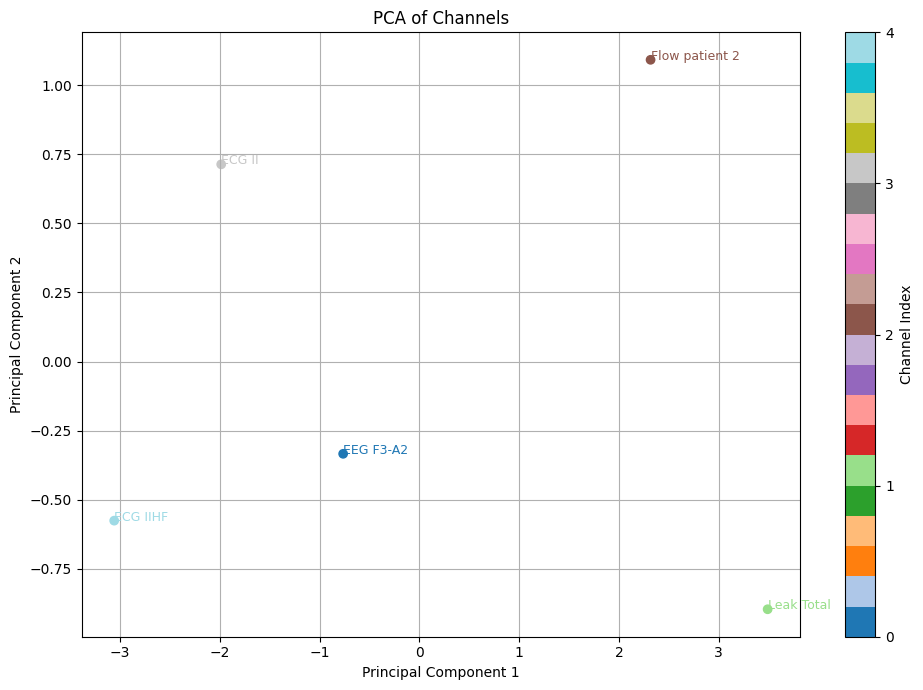

In [66]:
top_5_mild_dict = {
    "EEG F3-A2": means_dict["mild"]["EEG F3-A2"],
    "Leak Total": means_dict["mild"]["Leak Total"],
    "Flow patient 2": means_dict["mild"]["Flow patient 2"],
    "ECG II": means_dict["mild"]["ECG II"],
    "ECG IIHF": means_dict["mild"]["ECG IIHF"]
}

top_5_mild_df = pd.DataFrame(top_5_mild_dict).T  # Transpose to make channels the rows and time points the columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(top_5_mild_df)
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Generate a color map
num_channels = X_pca.shape[0]
colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors

# Get the channel names
channel_names = top_5_mild_df.index.tolist()

# Plot the results with different colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(num_channels), cmap='tab20')

# Add a color bar to indicate which color corresponds to which channel
plt.colorbar(scatter, ticks=np.arange(num_channels), label='Channel Index')

# Annotate each point with the corresponding channel name
for i, channel in enumerate(channel_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], channel, fontsize=9, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Channels')
plt.grid(True)
plt.tight_layout()
plt.show()

Explained variance by each component: [0.96772932 0.03139878]


C:\Users\anany\AppData\Local\Temp\ipykernel_23088\503704135.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors


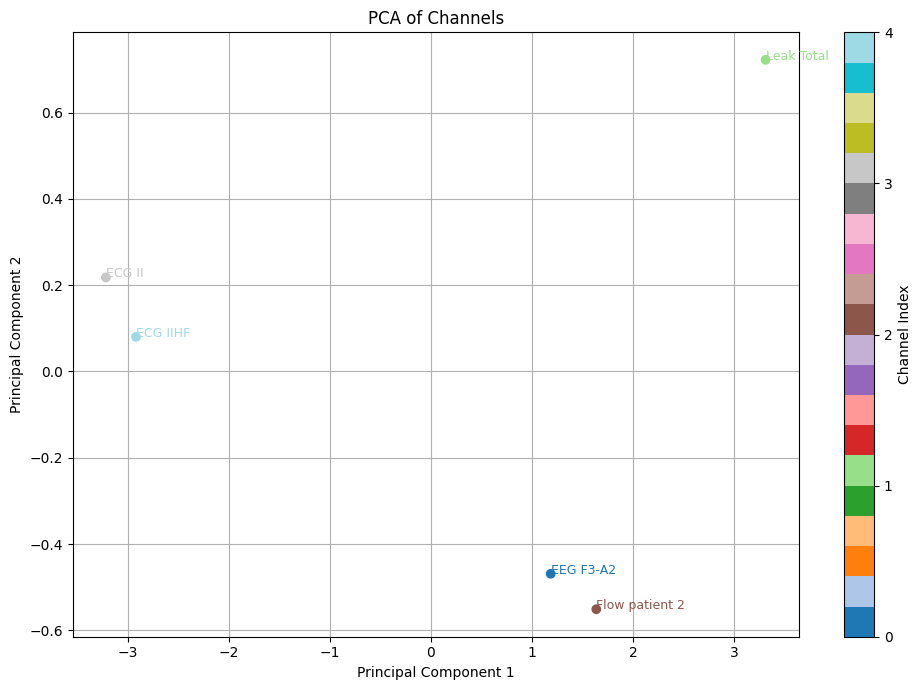

In [67]:
top_5_moderate_dict = {
    "EEG F3-A2": means_dict["moderate"]["EEG F3-A2"],
    "Leak Total": means_dict["moderate"]["Leak Total"],
    "Flow patient 2": means_dict["moderate"]["Flow patient 2"],
    "ECG II": means_dict["moderate"]["ECG II"],
    "ECG IIHF": means_dict["moderate"]["ECG IIHF"]
}

top_5_moderate_df = pd.DataFrame(top_5_moderate_dict).T  # Transpose to make channels the rows and time points the columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(top_5_moderate_df)
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Generate a color map
num_channels = X_pca.shape[0]
colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors

# Get the channel names
channel_names = top_5_moderate_df.index.tolist()

# Plot the results with different colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(num_channels), cmap='tab20')

# Add a color bar to indicate which color corresponds to which channel
plt.colorbar(scatter, ticks=np.arange(num_channels), label='Channel Index')

# Annotate each point with the corresponding channel name
for i, channel in enumerate(channel_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], channel, fontsize=9, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Channels')
plt.grid(True)
plt.tight_layout()
plt.show()

Explained variance by each component: [0.91686485 0.07487906]


C:\Users\anany\AppData\Local\Temp\ipykernel_23088\2834207748.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors


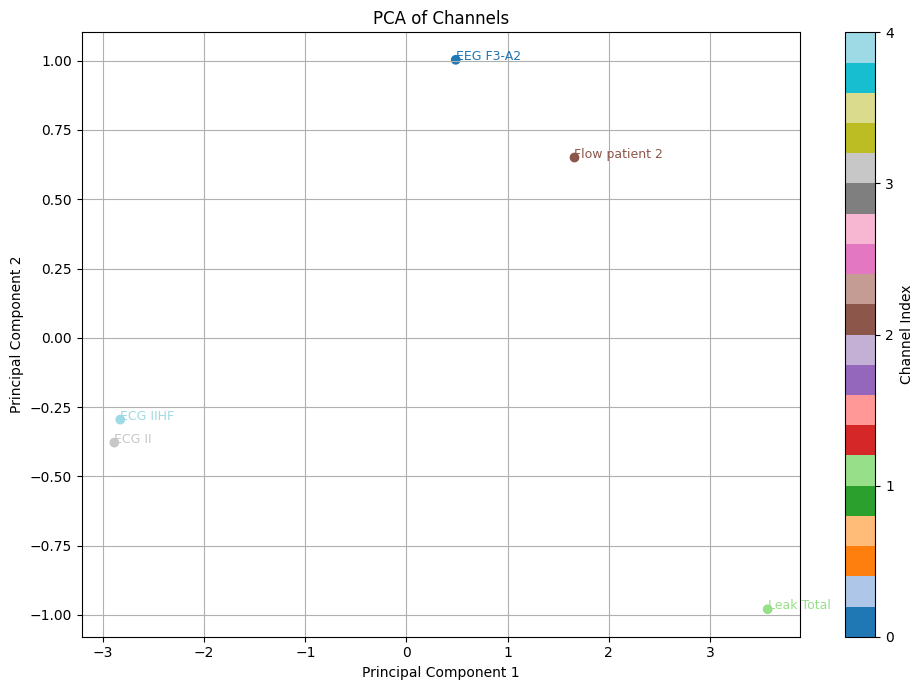

In [68]:
top_5_severe_dict = {
    "EEG F3-A2": means_dict["severe"]["EEG F3-A2"],
    "Leak Total": means_dict["severe"]["Leak Total"],
    "Flow patient 2": means_dict["severe"]["Flow patient 2"],
    "ECG II": means_dict["severe"]["ECG II"],
    "ECG IIHF": means_dict["severe"]["ECG IIHF"]
}

top_5_severe_df = pd.DataFrame(top_5_severe_dict).T  # Transpose to make channels the rows and time points the columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(top_5_severe_df)
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Generate a color map
num_channels = X_pca.shape[0]
colors = plt.cm.get_cmap('tab20', num_channels)  # Use a colormap with enough colors

# Get the channel names
channel_names = top_5_severe_df.index.tolist()

# Plot the results with different colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.arange(num_channels), cmap='tab20')

# Add a color bar to indicate which color corresponds to which channel
plt.colorbar(scatter, ticks=np.arange(num_channels), label='Channel Index')

# Annotate each point with the corresponding channel name
for i, channel in enumerate(channel_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], channel, fontsize=9, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Channels')
plt.grid(True)
plt.tight_layout()
plt.show()